<a href="https://colab.research.google.com/github/Gabrielvss/Fetal-Health-Classification/blob/main/1_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando os Dados
Os dados consistem no parâmetros do exame de Cardiotocogramas (CTGs) feitos nos fetos em gestação. Os dados obtidos são a frequência cardíaca fetal (FCF), movimentos fetais, contrações uterinas entre outros, para prevenir a mortalidade infantil e materna.

fonte: https://www.kaggle.com/andrewmvd/fetal-health-classification

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# Análise exploratória  dos dados

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


O Dataset contem 22 duas variáveis, sendo a fetal health a label alvo para o modelo de Machine Learning, essa é a unica variável categorica e classifica o estado de saúde do feto em três categorias:

* 1 Normal
* 2 Suspeito
* 3 Patológico

As outras labels possuem valores numericos dos parâmetros do exame ou histogrmas desses dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Utilizando Histograma para analisar as labels

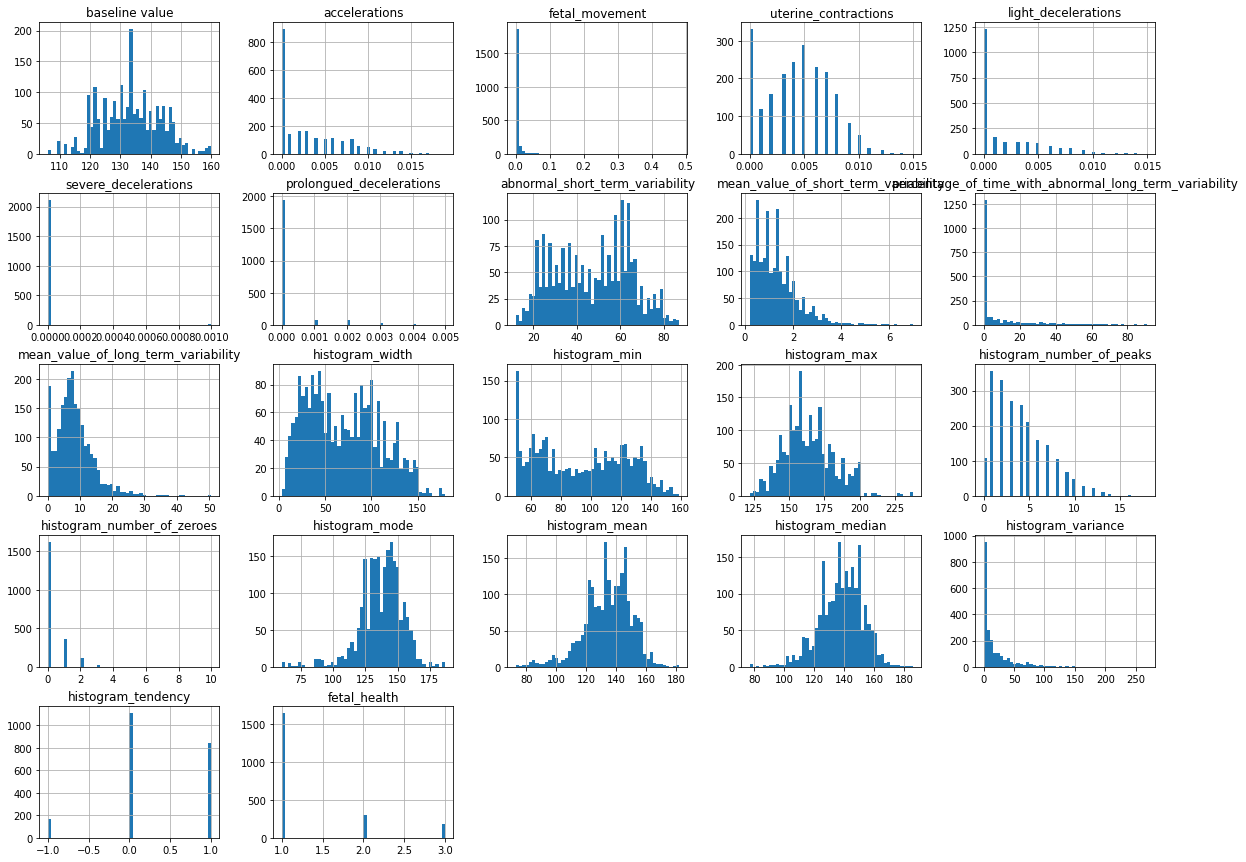

In [ ]:
df.hist(bins=50, figsize=(20,15));

O histograma do dataset permite um análise visual da distribuição de cada feature dos dados:

I - muitos dados como light aceleration, fetal movement prolongued decelaration possuem muitos valores nulos, iguais a zero, com uma escala baixa ou seja proximos a zero.

II - As variáveis que estão em escalas maiores possuem poucos valores nulos.

III - A base de dados utiliza os dados obtidos do exame para formar vários histograma.

IV - A variavel alvo é a fetal health e possui três categorias normal (1), suspeito (2) e patológico (3).


## Encontrando dados faltantes

In [ ]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Representando graficamente 

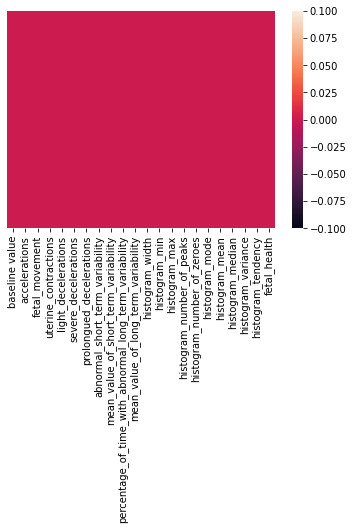

In [ ]:
ax = sns.heatmap(df.isnull(),yticklabels=False);


Como é possível notar a base de dados não possui valores faltante.

# Análisando as Variáveis 
Para entender melhor quais as melhores váriaveis para construir um modelo será feita uma análise univariada nos dados, isso vai permiter entender a relação de cada label e o alvo do modelo.


O algoritimo Utilizado será o selectKBest que seleciona as labels de acordo com o maior score K.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
#separando as Labels do alvo
from sklearn.feature_selection import SelectKBest, f_classif
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
fit_best_features = SelectKBest(score_func=f_classif,k=10)
best_features=fit_best_features.fit(X,y)

In [ ]:
df_k = pd.DataFrame(best_features.scores_)
df_k_scores = pd.concat([df_k,pd.DataFrame(X.columns)],axis=1)
df_k_scores.columns=['scores','Labels']
df_k_scores

,scores,Labels
0,140.621076,baseline value
1,196.027523,accelerations
2,11.679797,fetal_movement
3,93.715743,uterine_contractions
4,66.864754,light_decelerations
5,28.448156,severe_decelerations
6,505.853206,prolongued_decelerations
7,343.820419,abnormal_short_term_variability
8,119.882006,mean_value_of_short_term_variability
9,345.156385,percentage_of_time_with_abnormal_long_term_var...


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


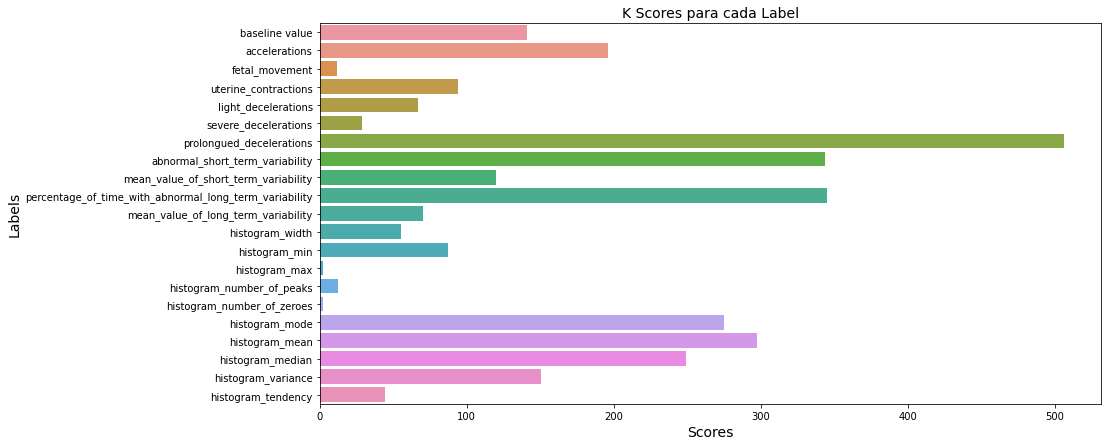

In [ ]:

fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(df_k_scores.iloc[:,0], df_k_scores.iloc[:,1], ax=ax, data=df_k_scores)

ax.set_title('K Scores para cada Label',fontdict={'fontsize':14})
ax.set_xlabel('Scores',fontdict={'fontsize':14})
ax.set_ylabel('Labels',fontdict={'fontsize':14})
plt.show();

## Análisando as correlações 

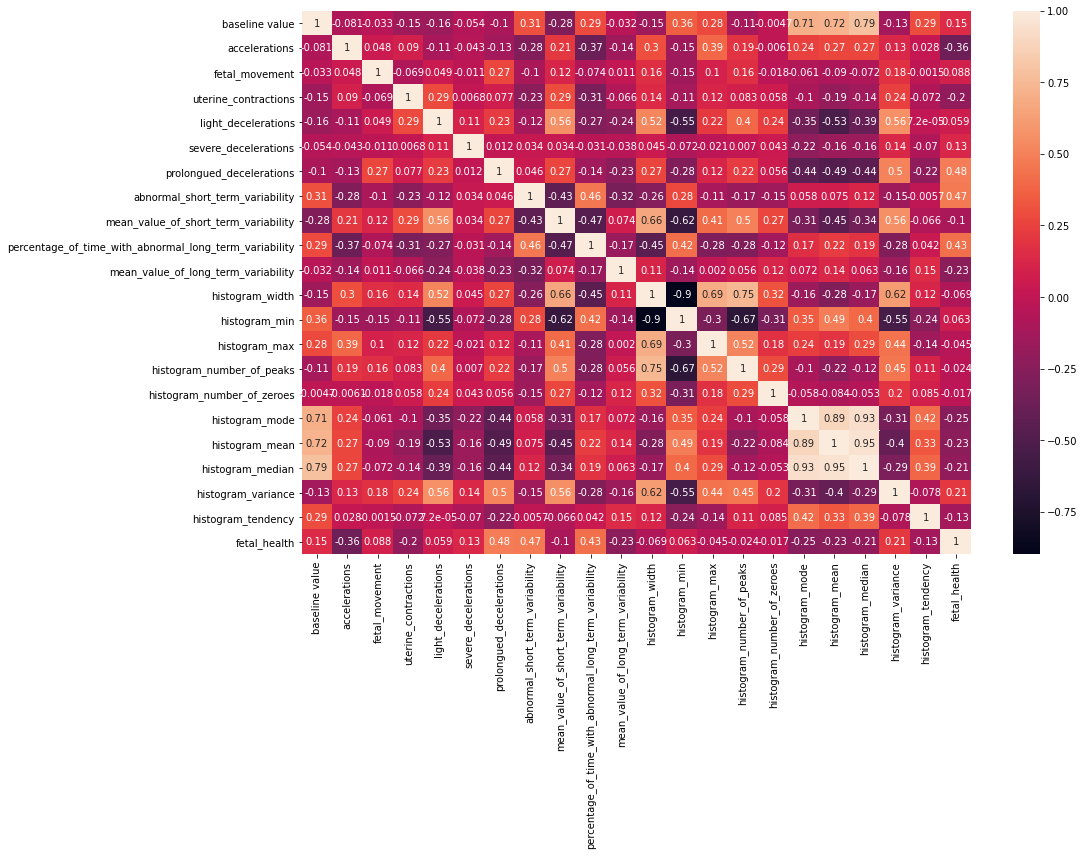

In [ ]:
corr=df.corr()
fig, axes = plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True);

# Análisando a variável alvo

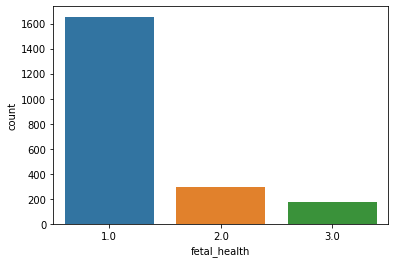

In [ ]:
ax = sns.countplot(x="fetal_health", data=df);

Como é possível notar a categoria 1 que corresponde a saudável possui um valor muito maior em relação as outras, ou seja uma frequência maior, esse desbalanceamento dos dados pode impactar na correlção das features da Base dados. 
Para corrigir esse problema será feito um balanceamento utilizando a tecnica de Oversampling nos dados. 

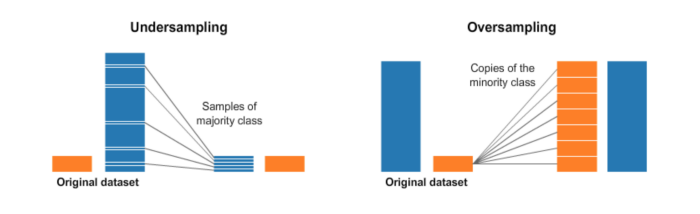


In [ ]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_resampling, y_resampling = os.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


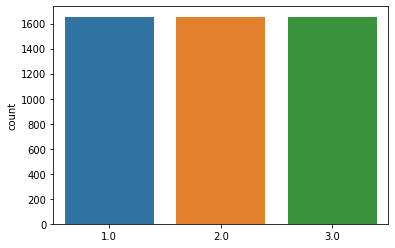

In [ ]:
ax = sns.countplot(x=y_resampling );

Esse balanceamento foi feito em toda a base neste notebook para ilustrar o funcionamento do mesmo, porém ele será utilizado de fato no notebook de contrução dos modelos de Machine Learning.